In [39]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import mdtraj
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go

In [4]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00081','PED00082','PED00083','PED00084']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00081.dcd.
- Found 40 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00082.dcd.
- Found 40 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00083.dcd.
- Found 40 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00084.dcd.
- Found 40 conformations.


In [5]:
pipeline.featurize(featurization=featurization,
                   featurization_params=featurization_params[featurization])

# Featurizing the PED00081 ensemble.
- Featurized ensemble shape: (40, 1953)
# Featurizing the PED00082 ensemble.
- Featurized ensemble shape: (40, 1953)
# Featurizing the PED00083 ensemble.
- Featurized ensemble shape: (40, 1953)
# Featurizing the PED00084 ensemble.
- Featurized ensemble shape: (40, 1953)
Concatenated featurized ensemble shape: (160, 1953)


In [6]:
trajectories= pipeline.trajectories
trajectories

{'PED00081': <mdtraj.Trajectory with 40 frames, 988 atoms, 64 residues, without unitcells at 0x1327f3e00>,
 'PED00082': <mdtraj.Trajectory with 40 frames, 988 atoms, 64 residues, without unitcells at 0x12ffd7e30>,
 'PED00083': <mdtraj.Trajectory with 40 frames, 988 atoms, 64 residues, without unitcells at 0x12ffd40b0>,
 'PED00084': <mdtraj.Trajectory with 40 frames, 988 atoms, 64 residues, without unitcells at 0x130df4290>}

### Distance matrix 

In [17]:
ca_xyz_dict=dict_coord(trajectories)
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)

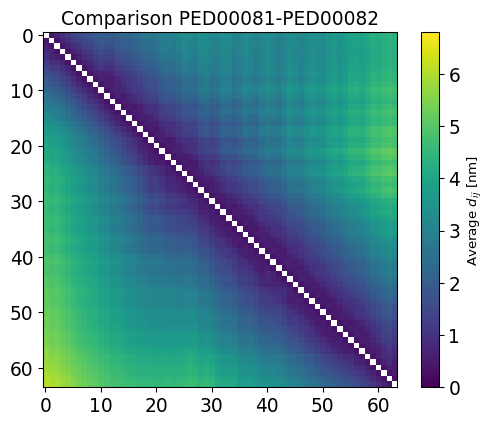

In [8]:
plot_average_dmap_comparison(distance_matrix_dict['PED00081'],distance_matrix_dict['PED00082'],'Comparison PED00081-PED00082')

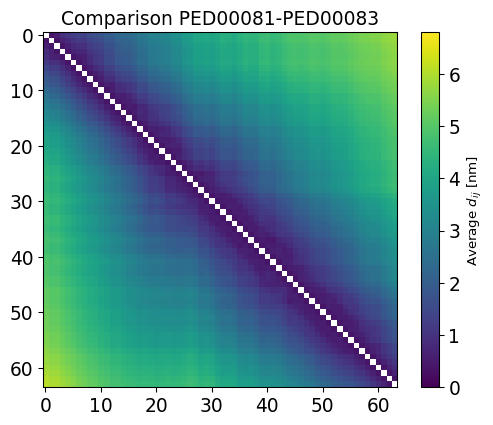

In [9]:
plot_average_dmap_comparison(distance_matrix_dict['PED00081'],distance_matrix_dict['PED00083'],'Comparison PED00081-PED00083')

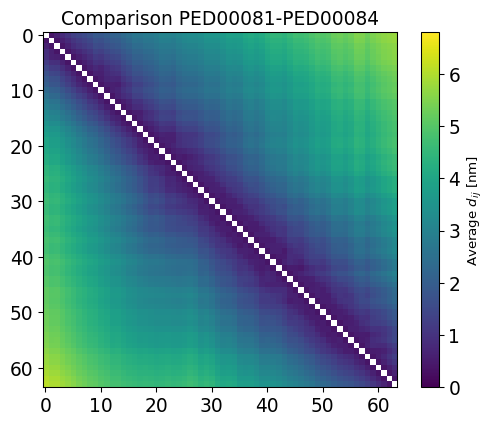

In [10]:
plot_average_dmap_comparison(distance_matrix_dict['PED00081'],distance_matrix_dict['PED00084'],'Comparison PED00081-PED00084')

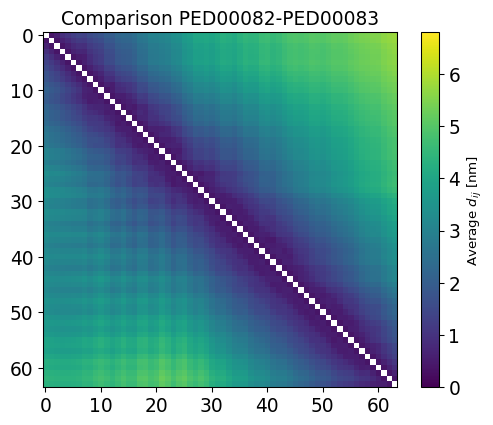

In [11]:
plot_average_dmap_comparison(distance_matrix_dict['PED00082'],distance_matrix_dict['PED00083'],'Comparison PED00082-PED00083')

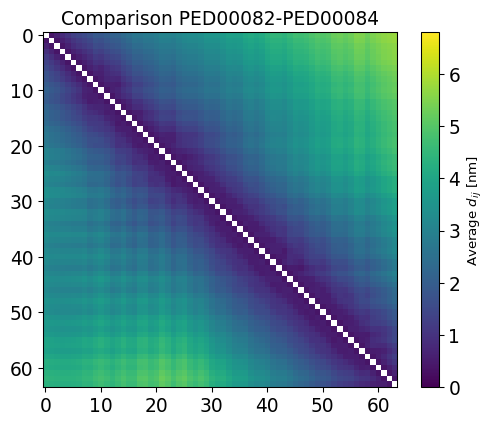

In [12]:
plot_average_dmap_comparison(distance_matrix_dict['PED00082'],distance_matrix_dict['PED00084'],'Comparison PED00082-PED00084')

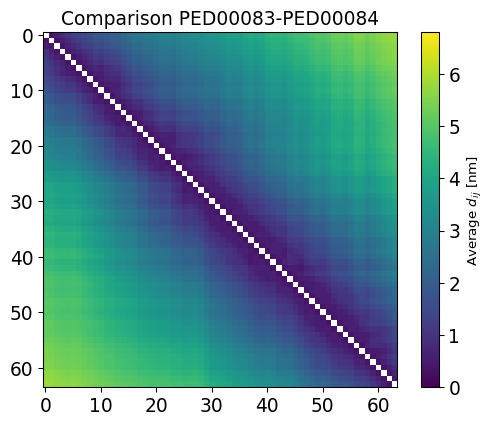

In [13]:
plot_average_dmap_comparison(distance_matrix_dict['PED00083'],distance_matrix_dict['PED00084'],'Comparison PED00083-PED00084')

### Contact map

In [18]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)

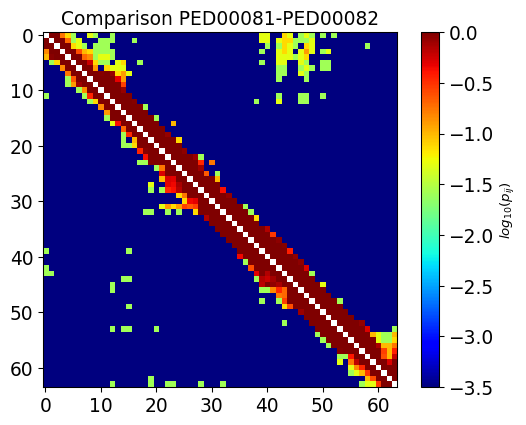

In [19]:
plot_cmap_comparison(contact_map_dict['PED00081'],contact_map_dict['PED00082'],'Comparison PED00081-PED00082')

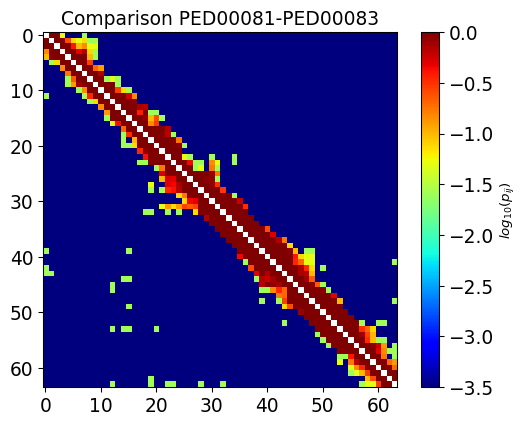

In [20]:
plot_cmap_comparison(contact_map_dict['PED00081'],contact_map_dict['PED00083'],'Comparison PED00081-PED00083')

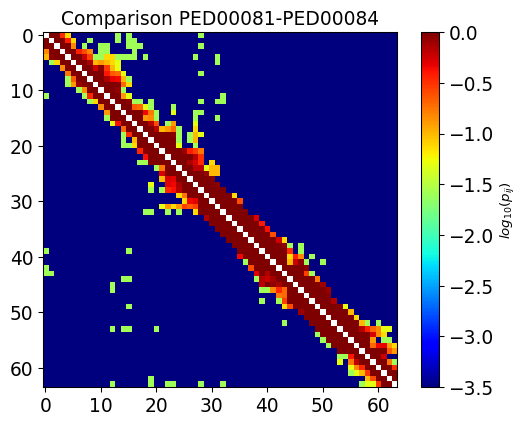

In [21]:
plot_cmap_comparison(contact_map_dict['PED00081'],contact_map_dict['PED00084'],'Comparison PED00081-PED00084')

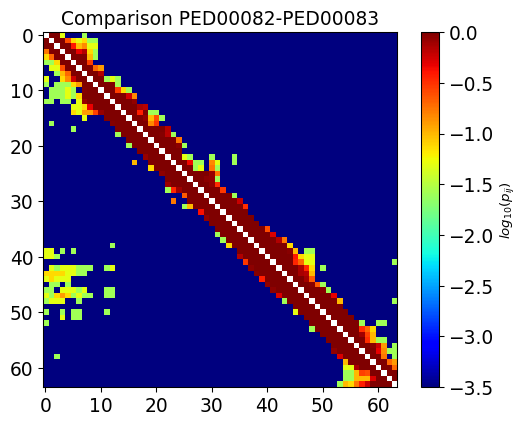

In [22]:
plot_cmap_comparison(contact_map_dict['PED00082'],contact_map_dict['PED00083'],'Comparison PED00082-PED00083')

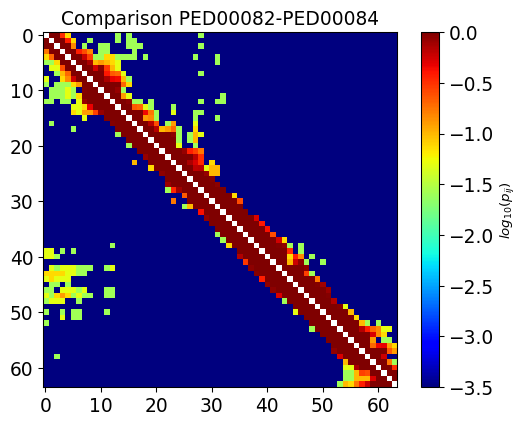

In [23]:
plot_cmap_comparison(contact_map_dict['PED00082'],contact_map_dict['PED00084'],'Comparison PED00082-PED00084')

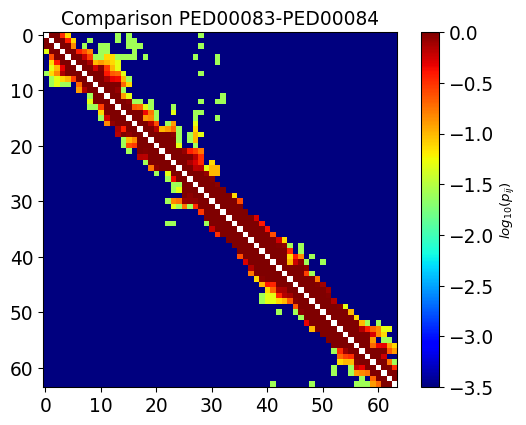

In [24]:
plot_cmap_comparison(contact_map_dict['PED00083'],contact_map_dict['PED00084'],'Comparison PED00083-PED00084')

### Angles analysis

In [26]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00081','PED00082','PED00083','PED00084']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)
trajectories_angles= pipeline.trajectories

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00081.dcd.
- Found 40 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00082.dcd.
- Found 40 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00083.dcd.
- Found 40 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/APELIN/PED00084.dcd.
- Found 40 conformations.


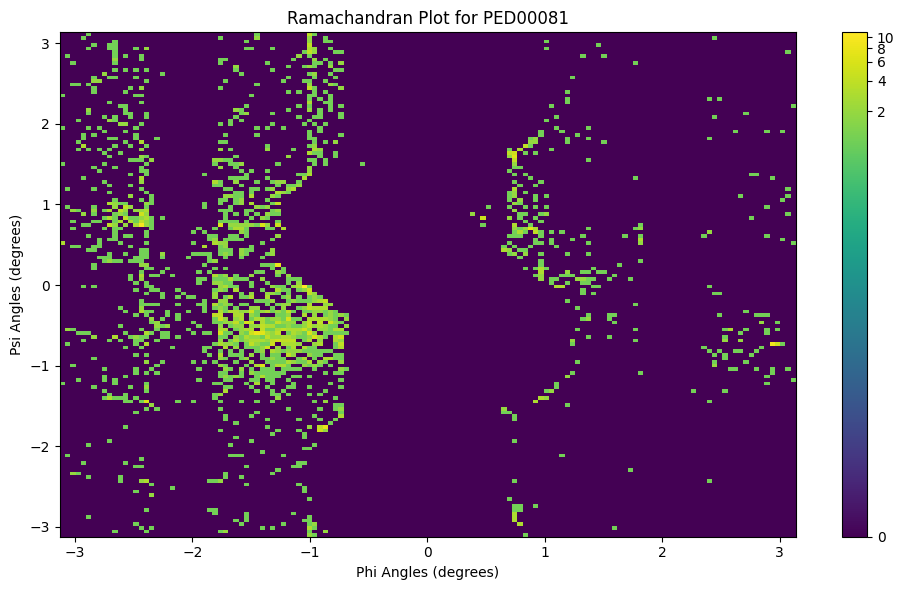

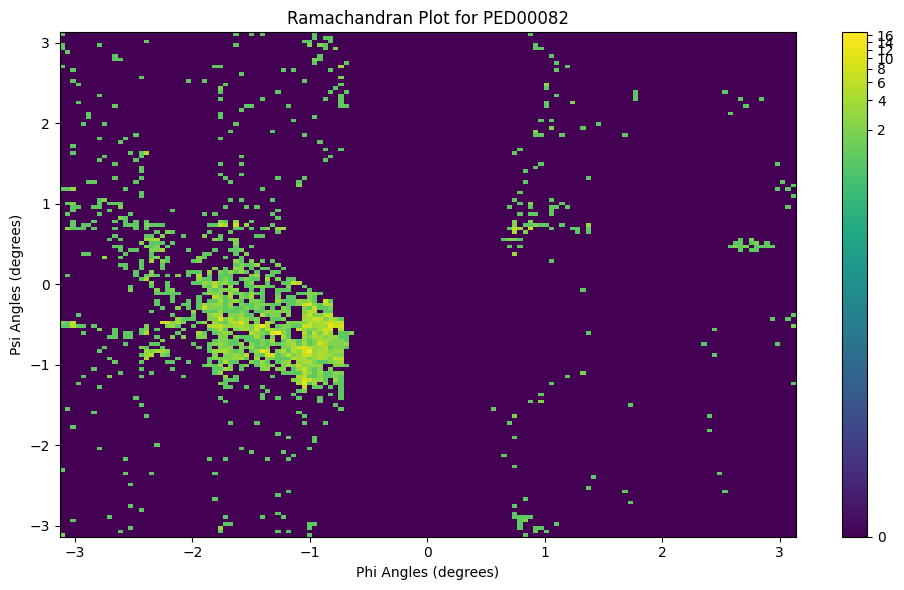

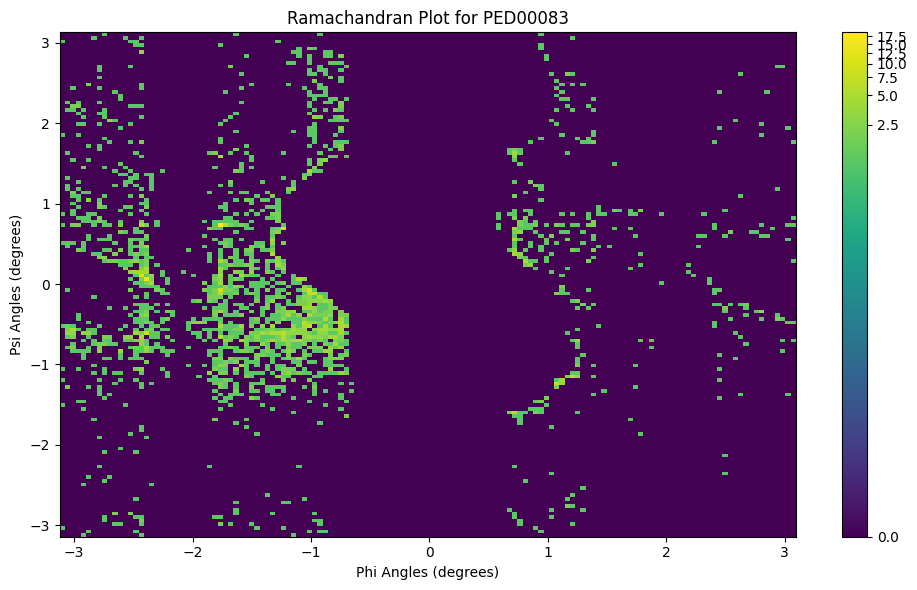

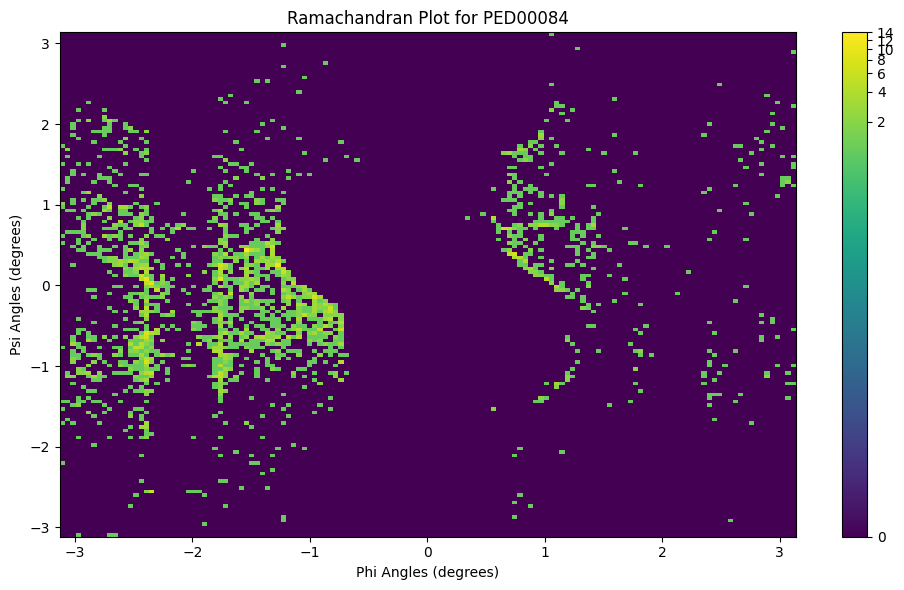

40

In [47]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)
len(dict_phi_psi_splitted['PED00081'][0])

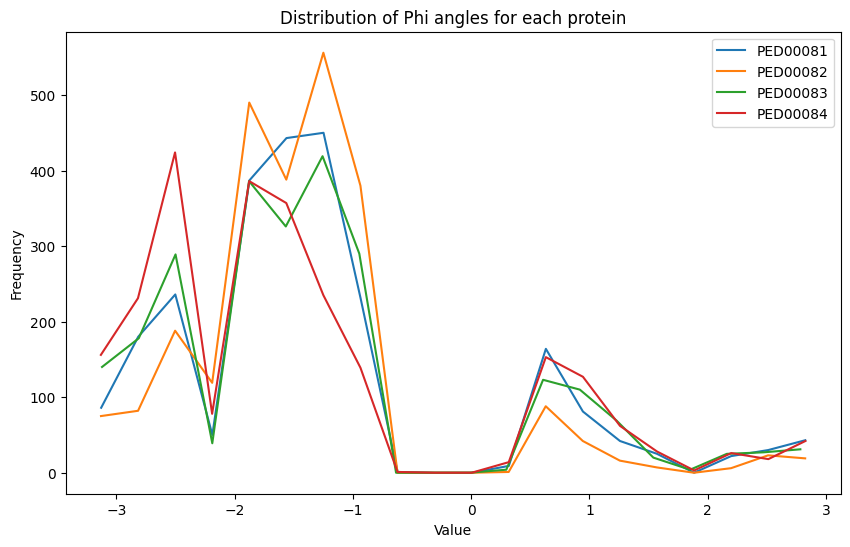

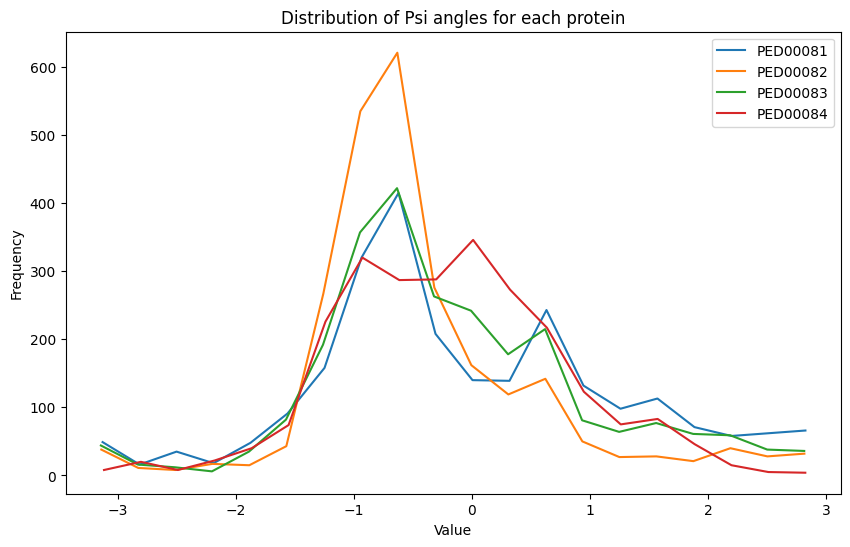

In [52]:
plt.figure(figsize=(10, 6))
for key, values in dict_phi_psi_splitted.items():
    hist, bins = np.histogram(values[0], bins=20)
    plt.plot(bins[:-1], hist, '-', label=key)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Phi angles for each protein')
plt.legend()
plt.show()

# Visualizza la forma della distribuzione della seconda lista per ogni chiave
plt.figure(figsize=(10, 6))
for key, values in dict_phi_psi_splitted.items():
    hist, bins = np.histogram(values[1], bins=20)
    plt.plot(bins[:-1], hist, '-', label=key)

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Distribution of Psi angles for each protein')
plt.legend()
plt.show()

## Global analysis
### Radius of gyration

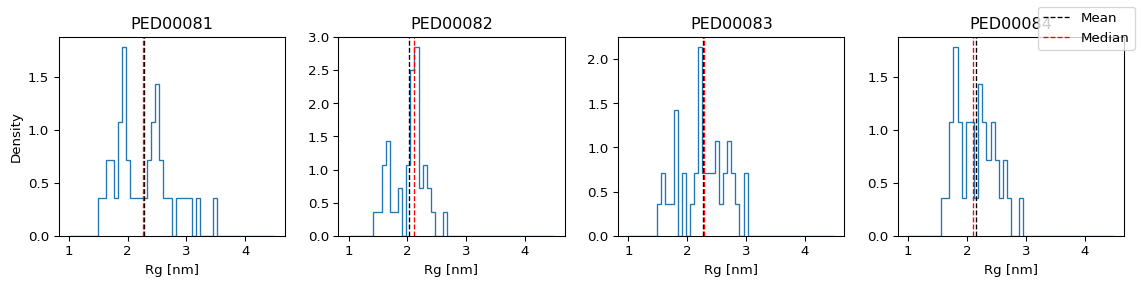

In [29]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)
plot_rg_comparison(Rgs_dict)

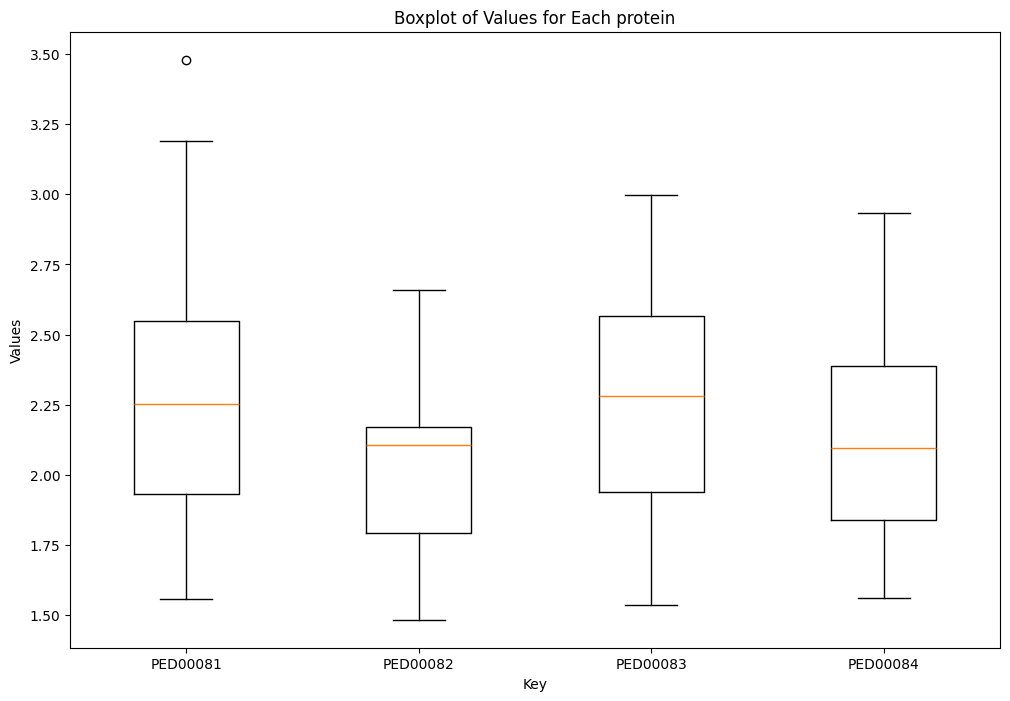

In [53]:
plt.figure(figsize=(12, 8))
plt.boxplot(Rgs_dict.values(), labels=Rgs_dict.keys())
plt.xlabel('Key')
plt.ylabel('Values')
plt.title('Boxplot of Values for Each protein')
plt.show()

### Alpha-elix content

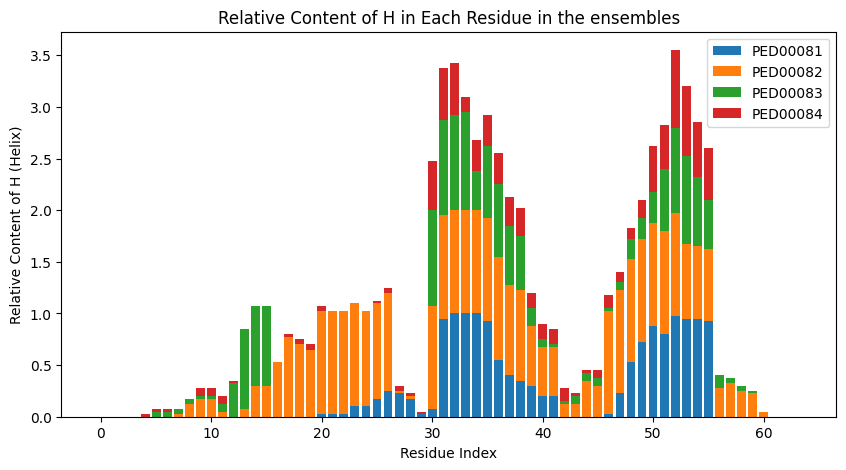

In [33]:
dssp_dict=get_dssp_dict(trajectories)
plot_relative_helix_content_multiple_proteins(dssp_dict)

###  Site specific order parameter

In [40]:
def plot_o_i(dict_o_i):
    fig = go.Figure()
    for key, o_i in dict_o_i.items():
        position = list(range(o_i.shape[0])) 
        trace = go.Scatter(x=position, y=o_i, mode='markers', name=key)
        fig.add_trace(trace)
    layout = go.Layout(
        title='Site-specific order parameter',
        xaxis=dict(title='Position'),
        yaxis=dict(title='Value', range=[0.18, 0.7]),
        width=1000,
        height=600
    )
    fig.update_layout(layout)
    fig.show()
dict_o_i = site_specific_order_parameter(ca_xyz_dict)
plot_o_i(dict_o_i)


### Site specific flexibility parameter

In [43]:
def featurize_phi_psi_dict(traj_dict, get_names=False):
    featurized_traj_dict = {}
    for traj_key, traj in traj_dict.items():
        atoms = list(traj.topology.atoms)
        phi_ids, phi = mdtraj.compute_phi(traj)
        psi_ids, psi = mdtraj.compute_psi(traj)
        phi_psi = np.concatenate([phi, psi], axis=1)
        if get_names:
            names = []
            for t in phi_ids:
                names.append(repr(atoms[t[1]].residue) + "-PHI")
            for t in psi_ids:
                names.append(repr(atoms[t[0]].residue) + "-PSI")
            featurized_traj_dict[traj_key] = (phi_psi, names)
        else:
            featurized_traj_dict[traj_key] = phi_psi
    return featurized_traj_dict
def split_phipsi_and_delate_lastphi_fristpsi_data(dictionary):
    phi_psi_separated = {}
    for key, value in dictionary.items():
        split_index = value.shape[1] // 2
        phi_array, psi_array = np.split(value, [split_index], axis=1)
        array_phi = np.delete(phi_array, -1, axis=1)
        array_psi = np.delete(psi_array, 0, axis=1)
        phi_psi_separated[key] = [array_phi, array_psi]
    return phi_psi_separated
phi_psi_separated = split_phipsi_and_delate_lastphi_fristpsi_data(featurize_phi_psi_dict(trajectories_angles))
def specific_site_flexibility_parameter(phi_psi_separated):
    f = {}
    for key, (phi_array, psi_array) in phi_psi_separated.items():
        Rsquare_phi =  np.square(np.mean(np.cos(phi_array), axis=0)) + np.square(np.mean(np.sin(phi_array), axis=0))
        Rsquare_psi = np.square(np.mean(np.cos(psi_array), axis=0)) + np.square(np.mean(np.sin(psi_array), axis=0))
        f_i = np.round(1 - (1/2 * np.sqrt(Rsquare_phi)) - (1/2 * np.sqrt(Rsquare_psi)), 5)
        f[key] = f_i
    return f
flexibility_parameter=specific_site_flexibility_parameter(phi_psi_separated)
def plot_scatter(flexibility_paramet):
    fig = go.Figure()
    for key, val in flexibility_paramet.items():
        position = list(range(val.shape[0])) 
        trace = go.Scatter(x=position, y=val, mode='markers', name=key)
        fig.add_trace(trace)
    
    layout = go.Layout(
        title='Site-specific flexiblity parameter',
        xaxis=dict(title='Position'),
        yaxis=dict(title='Value',range=[0,0.9]),
        width=1000,
        height=600
    )
    fig.update_layout(layout)
    fig.show()
plot_scatter(flexibility_parameter)